In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
flights = pd.read_csv ('flight_edges.tsv', sep='\t', names=["Origin", "Destination", "Origin City", "Destination City", "Passengers", "Seats", "Flights", "Distance", "Fly Date", "Origin Population", "Destination Population"])

In [133]:
flights.head()

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254.0,200810,122049,86219
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103.0,199011,284093,76034
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103.0,199012,284093,76034
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103.0,199010,284093,76034
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156.0,199002,147300,76034


In [134]:
flights.shape

(3606803, 11)

In [135]:
flights.describe(include='all').loc['unique', :]

Origin                    683
Destination               708
Origin City               535
Destination City          548
Passengers                NaN
Seats                     NaN
Flights                   NaN
Distance                  NaN
Fly Date                  NaN
Origin Population         NaN
Destination Population    NaN
Name: unique, dtype: object

In [136]:
nyflights = flights[flights['Origin City'] == 'New York, NY']

In [137]:
nyflights

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population
10099,JFK,ERI,"New York, NY","Erie, PA",82,101,1,347.0,199505,34261384,280044
10218,LGA,ERI,"New York, NY","Erie, PA",87,100,1,339.0,199711,34528632,279513
10630,LGA,ERI,"New York, NY","Erie, PA",36,37,1,339.0,200007,36705486,280734
11528,JFK,ERI,"New York, NY","Erie, PA",45,50,1,347.0,200607,37651266,279929
11529,LGA,ERI,"New York, NY","Erie, PA",37,37,1,339.0,200606,37651266,279929
...,...,...,...,...,...,...,...,...,...,...,...
3605747,LGA,COS,"New York, NY","Colorado Springs, CO",132,138,1,1638.0,200808,37937002,616975
3605749,LGA,COS,"New York, NY","Colorado Springs, CO",175,182,1,1638.0,200808,37937002,616975
3606128,JFK,COS,"New York, NY","Colorado Springs, CO",134,160,1,1644.0,200906,38139592,626227
3606129,LGA,COS,"New York, NY","Colorado Springs, CO",179,182,1,1638.0,200908,38139592,626227


In [138]:
flights[['Fly Year', 'Fly Month']] = flights['Fly Date'].astype(str).str.extract(r'(?P<year>\d{4})(?P<month>\d{2})')

In [139]:
flights_small = flights.sample(1000)

In [140]:
flights_small.head()

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population,Fly Year,Fly Month
2568185,IAD,GSO,"Washington, DC","Greensboro, NC",975,2953,77,239.0,199111,8369110,548939,1991,11
1712121,DFW,LGA,"Dallas, TX","New York, NY",41891,64098,462,1389.0,199807,9475022,34683010,1998,07
670670,TUS,ATL,"Tucson, AZ","Atlanta, GA",8157,9514,67,1541.0,200602,975476,5119641,2006,02
3103072,DTW,MSP,"Detroit, MI","Minneapolis, MN",6590,7400,74,528.0,200307,8985512,3078253,2003,07
1877232,LAX,SYR,"Los Angeles, CA","Syracuse, NY",123,168,1,2351.0,199707,23583460,656224,1997,07


In [141]:
flights_small.pivot_table(index=["Origin"], columns=["Fly Year"], values=["Passengers"], aggfunc=np.sum)

Passengers                                                            \
Fly Year       1990 1991 1992   1993    1994    1995 1996   1997    1998 1999   
Origin                                                                          
ABE             NaN  NaN  NaN    NaN     NaN     NaN  NaN    NaN  2618.0  NaN   
ABQ             NaN  NaN  NaN    NaN     NaN   124.0  NaN  165.0     NaN  NaN   
ABR             NaN  NaN  NaN    NaN     NaN     NaN  NaN    NaN     NaN  NaN   
ACT             NaN  NaN  NaN    NaN     NaN     NaN  NaN    NaN     NaN  NaN   
ACY             NaN  NaN  NaN    NaN     NaN  1337.0  NaN    NaN     NaN  NaN   
...             ...  ...  ...    ...     ...     ...  ...    ...     ...  ...   
TUS             NaN  NaN  NaN    NaN     NaN     NaN  NaN    NaN     NaN  NaN   
TYS             NaN  NaN  NaN   57.0     NaN     NaN  NaN    NaN     NaN  NaN   
XNA             NaN  NaN  NaN    NaN     NaN     NaN  NaN    NaN     NaN  NaN   
YIP             NaN  NaN  NaN    NaN     NaN     NaN  NaN    NaN     NaN  NaN   
YKM             NaN  NaN  NaN  328.0  1331.0     NaN  NaN    NaN     NaN  NaN   

                                                                                
Fly Year   2000 2001 2002  2003    2004   2005    2006    2007     2008   2009  
Origin                                                                          
ABE         NaN  NaN  NaN  44.0  1339.0    NaN     NaN     NaN   2696.0    NaN  
ABQ         NaN  NaN  NaN   NaN     NaN    NaN     NaN     NaN  12872.0  592.0  
ABR       176.0  NaN  NaN   NaN  2967.0    NaN     NaN     NaN      NaN    NaN  
ACT         NaN  NaN  NaN   NaN     NaN  120.0     NaN     NaN      NaN    NaN  
ACY         NaN  NaN  NaN   NaN     NaN    NaN     NaN     NaN      NaN    NaN  
...         ...  ...  ...   ...     ...    ...     ...     ...      ...    ...  
TUS        38.0  NaN  NaN   NaN  2470.0    NaN  8157.0     NaN      NaN    NaN  
TYS         NaN  NaN  NaN   NaN     NaN    NaN     NaN     NaN      NaN    NaN  
XNA         NaN  NaN  NaN   NaN    48.0    NaN     NaN  1185.0      NaN    NaN  
YIP         0.0  NaN  NaN   NaN     NaN    NaN     NaN     NaN      NaN    NaN  
YKM         NaN  NaN  NaN   NaN     NaN    NaN     NaN     NaN      NaN    NaN  

[174 rows x 20 columns]

In [142]:
flights.pivot_table(index=["Fly Year"], values=["Passengers"], aggfunc=np.sum)

,Passengers
Fly Year,
1990,370404412
1991,366689941
1992,383323302
1993,391096541
1994,426130721
1995,441706772
1996,467885967
1997,481929580
1998,491917421


<AxesSubplot:xlabel='Fly Year'>

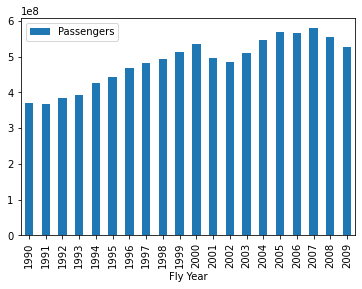

In [197]:
flights.pivot_table(index=["Fly Year"], values=["Passengers"], aggfunc=np.sum).plot(kind="bar")

In [144]:
print(np.unique(flights[['Origin']].values))

['1B1' 'ABE' 'ABI' 'ABQ' 'ABR' 'ABY' 'ACT' 'ACV' 'ACY' 'ADM' 'ADQ' 'ADS'
 'AEX' 'AFW' 'AGC' 'AGS' 'AHN' 'AID' 'AIY' 'ALB' 'ALM' 'ALO' 'ALW' 'AMA'
 'AMK' 'AMW' 'ANB' 'ANC' 'AND' 'AOH' 'AOO' 'APC' 'APF' 'APN' 'AR1' 'ARA'
 'ART' 'ASL' 'ASN' 'AST' 'ATL' 'ATO' 'ATW' 'ATY' 'AUG' 'AUO' 'AUS' 'AVL'
 'AVP' 'AXN' 'AXV' 'AZA' 'AZO' 'BAD' 'BBC' 'BDL' 'BDR' 'BFD' 'BFF' 'BFI'
 'BFL' 'BFM' 'BFR' 'BGD' 'BGM' 'BGR' 'BGS' 'BHM' 'BIF' 'BIH' 'BIL' 'BIS'
 'BJI' 'BJJ' 'BKG' 'BKL' 'BKW' 'BKX' 'BLI' 'BMC' 'BMG' 'BMI' 'BNA' 'BOK'
 'BOS' 'BPT' 'BQK' 'BRD' 'BRL' 'BRO' 'BSM' 'BTL' 'BTM' 'BTR' 'BTV' 'BUF'
 'BVX' 'BWD' 'BWG' 'BWI' 'BYH' 'BZN' 'CAD' 'CAE' 'CAK' 'CBE' 'CBM' 'CDC'
 'CEC' 'CEV' 'CGF' 'CGI' 'CGX' 'CHA' 'CHI' 'CHO' 'CHS' 'CIC' 'CID' 'CKB'
 'CLE' 'CLL' 'CLM' 'CLT' 'CLU' 'CMH' 'CMI' 'CNM' 'CNW' 'COS' 'COU' 'CPR'
 'CPS' 'CRE' 'CRP' 'CRS' 'CRW' 'CSG' 'CSV' 'CUB' 'CVG' 'CVN' 'CVO' 'CVS'
 'CWA' 'CWI' 'CYS' 'DAL' 'DAY' 'DBQ' 'DCA' 'DCU' 'DDC' 'DEC' 'DET' 'DFW'
 'DHN' 'DIK' 'DLF' 'DLH' 'DMA' 'DMO' 'DNE' 'DNN' 'D

In [151]:
flights.dtypes

Origin                     object
Destination                object
Origin City                object
Destination City           object
Passengers                  int64
Seats                       int64
Flights                     int64
Distance                  float64
Fly Date                    int64
Origin Population           int64
Destination Population      int64
Fly Year                   object
Fly Month                  object
dtype: object

In [177]:
flights_mask=(flights['Origin Population'] > 2000000) & (flights['Passengers']> 1000)

In [178]:
filtered_flights = flights[flights_mask]

In [179]:
filtered_flights.head()

,Origin,Destination,Origin City,Destination City,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population,Fly Year,Fly Month
49,SFO,RDM,"San Francisco, CA","Bend, OR",1413,2760,92,462.0,199003,7436126,76034,1990,03
52,SFO,RDM,"San Francisco, CA","Bend, OR",1394,2640,88,462.0,199006,7436126,76034,1990,06
55,SFO,RDM,"San Francisco, CA","Bend, OR",1661,2790,93,462.0,199008,7436126,76034,1990,08
57,SFO,RDM,"San Francisco, CA","Bend, OR",1093,2640,88,462.0,199005,7436126,76034,1990,05
64,SFO,RDM,"San Francisco, CA","Bend, OR",1080,2490,83,462.0,199004,7436126,76034,1990,04


In [180]:
print(np.unique(filtered_flights[['Origin']].values))

['ATL' 'AZA' 'BFI' 'BOS' 'BWI' 'CGX' 'CLE' 'CVG' 'DAL' 'DCA' 'DET' 'DFW'
 'DQF' 'DTW' 'EFD' 'EWR' 'FLL' 'FTW' 'GYY' 'HOU' 'IAD' 'IAH' 'ILG' 'JFK'
 'LAX' 'LGA' 'LKE' 'MCI' 'MCO' 'MDW' 'MIA' 'MSP' 'OAK' 'ORD' 'PBI' 'PDX'
 'PHL' 'PHX' 'PIT' 'SAN' 'SAT' 'SEA' 'SFB' 'SFO' 'SMF' 'SNA' 'STL' 'STP'
 'TPA']


In [189]:
filtered_flights.pivot_table(index=["Origin"], columns=["Fly Year"], values=["Passengers"], aggfunc=np.sum)

Passengers                                                  \
Fly Year        1990        1991        1992        1993        1994   
Origin                                                                 
ATL       20222979.0  15623507.0  17300773.0  19603466.0  22581991.0   
AZA              NaN         NaN         NaN         NaN         NaN   
BFI              NaN         NaN         NaN         NaN         NaN   
BOS        8461180.0   7793868.0   8117549.0   8494106.0   8985430.0   
BWI        4097216.0   3706312.0   3168059.0   3432556.0   4944735.0   
CGX              NaN      3578.0         NaN         NaN         NaN   
CLE        3581535.0   3043178.0   3255341.0   3255712.0   4426356.0   
CVG              NaN         NaN         NaN         NaN         NaN   
DAL        3235736.0   3146829.0   3306108.0   3591848.0   3785805.0   
DCA        7196453.0   6647335.0   6827968.0   7151443.0   6919171.0   
DET         348572.0    296631.0    270856.0    242411.0         NaN   
DFW       20244921.0  20340133.0  21924873.0  21600215.0  22206384.0   
DQF              NaN         NaN         NaN         NaN         NaN   
DTW        8622790.0   8269726.0   8685323.0   9138539.0  10176957.0   
EFD          16342.0      4548.0         NaN         NaN         NaN   
EWR        8007523.0   7678575.0   8165132.0   8505626.0   9659400.0   
FLL        3713489.0   3262144.0   3195693.0   3463058.0   4164761.0   
FTW              NaN         NaN         NaN         NaN         NaN   
GYY              NaN         NaN         NaN         NaN         NaN   
HOU        4134848.0   3928006.0   4195067.0   4280303.0   4189676.0   
IAD        3586658.0   3603672.0   3373867.0   2737717.0   2841635.0   
IAH        6176235.0   6412566.0   6947539.0   7140846.0   7936621.0   
ILG              NaN         NaN         NaN         NaN         NaN   
JFK        4847040.0   4305960.0   4592444.0   4215763.0   4769694.0   
LAX       16762600.0  16994395.0  16915277.0  16885105.0  17843513.0   
LGA        9720181.0   8240620.0   8429701.0   8392908.0   8819314.0   
LKE              NaN         NaN         NaN         NaN         NaN   
MCI              NaN         NaN         NaN         NaN         NaN   
MCO              NaN         NaN         NaN         NaN         NaN   
MDW        3505317.0   2891858.0   2135667.0   2922149.0   4068249.0   
MIA        6523146.0   6364481.0   6012705.0   6283758.0   6746222.0   
MSP        7898884.0   8053405.0   8693546.0   8952674.0   9216837.0   
OAK        1376500.0   1964777.0   2066928.0   2613070.0   3184829.0   
ORD       22162796.0  22454376.0  24740841.0  24722011.0  25586604.0   
PBI        2554945.0   2301510.0   2293068.0   2254925.0   2486471.0   
PDX              NaN         NaN         NaN         NaN         NaN   
PHL        6335088.0   5648768.0   5958376.0   6111020.0   6417000.0   
PHX        9785488.0  10711319.0  10352955.0  10797122.0  11948058.0   
PIT        7493189.0   7183163.0   7942168.0   7639859.0   7999815.0   
SAN              NaN   5075834.0   5393146.0   5441379.0   5907464.0   
SAT              NaN         NaN         NaN         NaN         NaN   
SEA        6606465.0   6805588.0   7452380.0   8010656.0   8927053.0   
SFB              NaN         NaN         NaN         NaN         NaN   
SFO       10775866.0  11776742.0  11894403.0  11617794.0  11793875.0   
SMF              NaN         NaN         NaN         NaN         NaN   
SNA        2059261.0   2372093.0   2367555.0   2604187.0   2997206.0   
STL        8680643.0   8618344.0   9516122.0   9275790.0  10906253.0   
STP              NaN         NaN         NaN         NaN      2434.0   
TPA        4874211.0   4377404.0   4333786.0   4492926.0   5415312.0   

                                                                      \
Fly Year        1995        1996        1997        1998        1999   
Origin                                                                 
ATL       24157387.0  26433449.0  28359823.0  302

In [192]:
filtered_flights.pivot_table(index=["Origin"], columns=["Fly Year"], values=["Passengers"], aggfunc=np.sum).dropna()

Passengers                                                  \
Fly Year        1990        1991        1992        1993        1994   
Origin                                                                 
ATL       20222979.0  15623507.0  17300773.0  19603466.0  22581991.0   
BOS        8461180.0   7793868.0   8117549.0   8494106.0   8985430.0   
BWI        4097216.0   3706312.0   3168059.0   3432556.0   4944735.0   
CLE        3581535.0   3043178.0   3255341.0   3255712.0   4426356.0   
DAL        3235736.0   3146829.0   3306108.0   3591848.0   3785805.0   
DCA        7196453.0   6647335.0   6827968.0   7151443.0   6919171.0   
DFW       20244921.0  20340133.0  21924873.0  21600215.0  22206384.0   
DTW        8622790.0   8269726.0   8685323.0   9138539.0  10176957.0   
EWR        8007523.0   7678575.0   8165132.0   8505626.0   9659400.0   
FLL        3713489.0   3262144.0   3195693.0   3463058.0   4164761.0   
HOU        4134848.0   3928006.0   4195067.0   4280303.0   4189676.0   
IAD        3586658.0   3603672.0   3373867.0   2737717.0   2841635.0   
IAH        6176235.0   6412566.0   6947539.0   7140846.0   7936621.0   
JFK        4847040.0   4305960.0   4592444.0   4215763.0   4769694.0   
LAX       16762600.0  16994395.0  16915277.0  16885105.0  17843513.0   
LGA        9720181.0   8240620.0   8429701.0   8392908.0   8819314.0   
MDW        3505317.0   2891858.0   2135667.0   2922149.0   4068249.0   
MIA        6523146.0   6364481.0   6012705.0   6283758.0   6746222.0   
MSP        7898884.0   8053405.0   8693546.0   8952674.0   9216837.0   
OAK        1376500.0   1964777.0   2066928.0   2613070.0   3184829.0   
ORD       22162796.0  22454376.0  24740841.0  24722011.0  25586604.0   
PBI        2554945.0   2301510.0   2293068.0   2254925.0   2486471.0   
PHL        6335088.0   5648768.0   5958376.0   6111020.0   6417000.0   
PHX        9785488.0  10711319.0  10352955.0  10797122.0  11948058.0   
PIT        7493189.0   7183163.0   7942168.0   7639859.0   7999815.0   
SEA        6606465.0   6805588.0   7452380.0   8010656.0   8927053.0   
SFO       10775866.0  11776742.0  11894403.0  11617794.0  11793875.0   
SNA        2059261.0   2372093.0   2367555.0   2604187.0   2997206.0   
STL        8680643.0   8618344.0   9516122.0   9275790.0  10906253.0   
TPA        4874211.0   4377404.0   4333786.0   4492926.0   5415312.0   

                                                                      \
Fly Year        1995        1996        1997        1998        1999   
Origin                                                                 
ATL       24157387.0  26433449.0  28359823.0  30230080.0  32124903.0   
BOS        9039500.0   9311313.0   9277979.0   9510463.0   9686210.0   
BWI        4972711.0   5203540.0   5808783.0   6346054.0   7435379.0   
CLE        4649027.0   4627510.0   4925460.0   4996546.0   5166676.0   
DAL        3793499.0   3942986.0   3786557.0   3721750.0   3754230.0   
DCA        6782203.0   6644702.0   6996625.0   7005471.0   6549094.0   
DFW       22688852.0  23392841.0  23819819.0  23781848.0  23733965.0   
DTW       10937352.0  11566386.0  12059885.0  12108581.0  13546477.0   
EWR        9585101.0  10355165.0  10849075.0  11134316.0  11349819.0   
FLL        3718406.0   4299124.0   4935883.0   5126362.0   5796609.0   
HOU        4210816.0   4417181.0   4273245.0   4527066.0   4635646.0   
IAD        3338901.0   3537214.0   3736155.0   4007927.0   5332564.0   
IAH        9237568.0   9703185.0  10452363.0  11113646.0  11753359.0   
JFK        5043551.0   5295050.0   5431047.0   5799391.0   6011175.0   
LAX       19260596.0  20538843.0  20550026.0  20550585.0  21747405.0   
LGA        8811277.0   8675310.0   9143796.0   9561941.0   9863447.0   
MDW        4212727.0   4205165.0   4134515.0   4714235.0   5844087.0   
MIA        7268413.0   7128407.0   7192148.0   7327764.0   7424650.0   
MSP        9887898.0  10401629.0  11198965.0  10915909.0  12366967.0   
OAK        3999070.0   4005809.0   3731328.0   36

<AxesSubplot:>

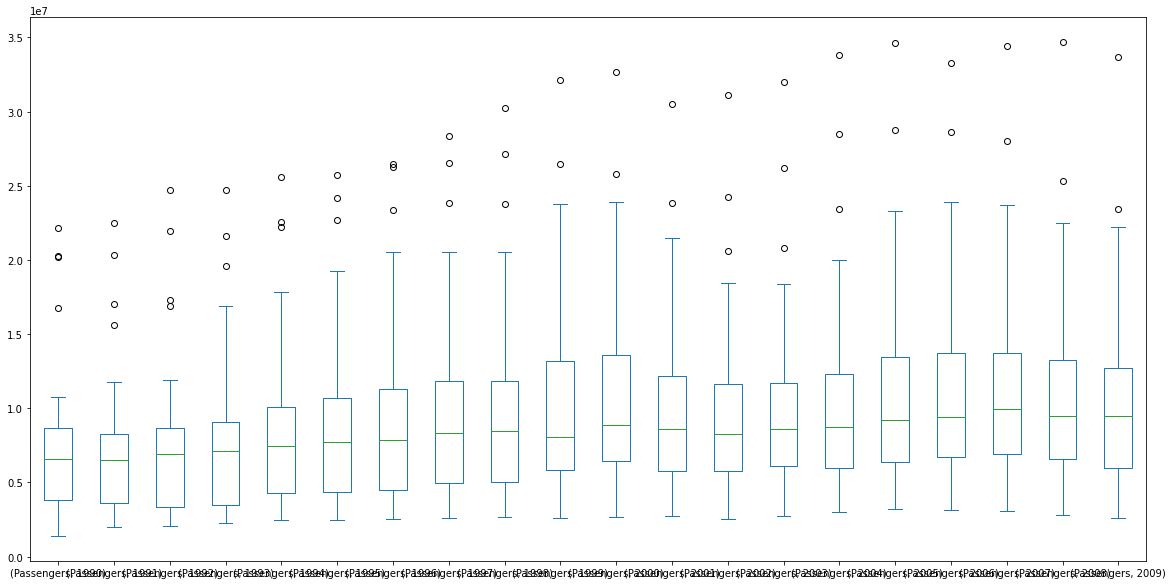

In [211]:
filtered_flights.pivot_table(index=["Origin"], columns=["Fly Year"], values=["Passengers"], aggfunc=np.sum).dropna().plot(kind="box", figsize=(20, 10))

In [ ]:
filtered_flights.pivot_table(index=["Origin"], columns=["Fly Year"], values=["Passengers"], aggfunc=np.sum).dropna()

In [71]:
flights.pivot_table(index=["Origin"], columns=["Fly Year"], values=["Passengers"], aggfunc=np.sum)

Passengers                                                         \
Fly Year       1990       1991       1992       1993       1994       1995   
Origin                                                                       
1B1             NaN        NaN        NaN        NaN        NaN        NaN   
ABE        381991.0   360990.0   392910.0   373948.0   397573.0   432248.0   
ABI          1625.0     1695.0     3714.0    39251.0    25046.0    20181.0   
ABQ       2490544.0  2359825.0  2484407.0  2691125.0  2942540.0  3045972.0   
ABR             NaN       70.0      113.0      100.0        NaN      124.0   
...             ...        ...        ...        ...        ...        ...   
YKM         48636.0    70665.0    79536.0    70697.0    68473.0    77630.0   
YKN             NaN        NaN        NaN        NaN        NaN        NaN   
YNG         12561.0    13779.0    15795.0    16556.0    18434.0    23242.0   
YUM         33161.0    31164.0    19972.0      588.0       55.0    18051.0   
ZZV             NaN        NaN        NaN        NaN        NaN        NaN   

                                                                            \
Fly Year       1996       1997       1998       1999       2000       2001   
Origin                                                                       
1B1             NaN        NaN        NaN        NaN        NaN        NaN   
ABE        416954.0   433099.0   422020.0   402007.0   450097.0   435331.0   
ABI         17065.0     8618.0    41906.0    52944.0    65438.0    57879.0   
ABQ       3370729.0  3156435.0  3114101.0  3187210.0  3162098.0  3099001.0   
ABR             NaN    21389.0    32664.0    32304.0    35961.0    45197.0   
...             ...        ...        ...        ...        ...        ...   
YKM         89998.0    72290.0    60387.0    63346.0    60142.0    54267.0   
YKN             NaN        NaN        NaN        NaN        NaN        NaN   
YNG         34496.0    36125.0    30543.0    30193.0    12407.0     9180.0   
YUM         48747.0    22483.0       96.0      281.0       35.0        0.0   
ZZV             NaN        NaN        NaN        NaN        NaN        0.0   

                                                                            \
Fly Year       2002       2003       2004       2005       2006       2007   
Origin                                                                       
1B1             NaN        NaN        NaN        NaN        NaN        NaN   
ABE        296785.0   439583.0   457522.0   403298.0   399175.0   409093.0   
ABI         49851.0    54777.0    75754.0    80730.0    97324.0   102455.0   
ABQ       2950314.0  2960264.0  3034578.0  3166773.0  3209439.0  3383059.0   
ABR         42382.0    47976.0    49674.0    46081.0    29207.0    28671.0   
...             ...        ...        ...        ...        ...        ...   
YKM         60270.0    55656.0    54917.0    58084.0    56806.0    72477.0   
YKN             NaN        0.0        NaN        NaN        NaN        0.0   
YNG          6891.0     7787.0    21082.0     6759.0    11878.0    16251.0   
YUM         14560.0    56146.0    60948.0    61514.0    66841.0    77009.0   
ZZV             0.0        0.0        0.0        NaN        NaN        0.0   

                                
Fly Year       2008       2009  
Origin                          
1B1             NaN        1.0  
ABE        380149.0   359427.0  
ABI         94380.0    88922.0  
ABQ       3211543.0  2864161.0  
ABR         24013.0    21086.0  
...             ...        ...  
YKM         69470.0    58671.0  
YKN             NaN        NaN  
YNG         16626.0    16773.0  
YUM         86231.0    74719.0  
ZZV             NaN        NaN  

[683 rows x 20 columns]

In [ ]:
flights.pivot_table(index=["Origin"], columns=["Fly Year"], values=["Passengers"], aggfunc=np.sum, dropna=True).reset_index()